## Research Question

How do institutional characteristics like institution type, degree level, tuition cost, and admissions selectivity relate to median earnings 10 years after entry?

## Target Audience

This analysis is intended for students, families, and policymakers interested in understanding how institutional characteristics of higher education relate to long-term earnings outcomes. The insights derived from this project aim to support more informed decision-making around college selection, resource allocation, and higher education policy by highlighting how factors such as institution type, degree level, tuition cost, and admissions selectivity are associated with post-graduation earnings.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/Most-Recent-Cohorts-Institution.csv', low_memory=False)
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,SCORECARD_SECTOR
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0,4
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0,4
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0,5
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,uah.clearcostcalculator.com/student/default/ne...,...,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0,4
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,tcc.ruffalonl.com/Alabama State University/Fre...,...,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0,4


In [3]:
# print all column names that are null and decide what to do (for each column how many null columns exist)
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

OPEID                       24
OPEID6                      24
ACCREDAGENCY               307
INSTURL                     12
NPCURL                     537
                          ... 
MD_EARN_WNE_INC3_P11      2923
MD_EARN_WNE_INDEP0_P11    1814
MD_EARN_WNE_INDEP1_P11    1810
MD_EARN_WNE_MALE0_P11     1601
MD_EARN_WNE_MALE1_P11     2203
Length: 3285, dtype: int64


In [4]:
cols_to_keep = [
    "INSTNM",        # institution name
    "CITY",
    "STABBR",        # state abbreviation
    "REGION",        # geographic region
    "CONTROL",       # 1=Public, 2=Private nonprofit, 3=Private for-profit
    "PREDDEG",       # predominant degree type
    "ADM_RATE",      # admission rate
    "SAT_AVG",       # average SAT
    "UGDS",          # undergraduate enrollment 
    "TUITIONFEE_IN", # in-state tuition
    "TUITIONFEE_OUT",# oos tuition
    "DEBT_MDN",      # median debt of completers
    "MD_EARN_WNE_P10", # med earnings 10 years after entry
    "RPY_3YR_RT",      # 3yr loan repayment rate
    "COMP_ORIG_YR4_RT" # 4yr completion rate
]

In [5]:
df_cleaned = df[cols_to_keep]
df_cleaned

,INSTNM,CITY,STABBR,REGION,CONTROL,PREDDEG,ADM_RATE,SAT_AVG,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,DEBT_MDN,MD_EARN_WNE_P10,RPY_3YR_RT,COMP_ORIG_YR4_RT
0,Alabama A & M University,Normal,AL,5,1,3,0.6622,947.0,5726.0,10024.0,18634.0,16600,40628.0,0.2531554273,0.222366710013
1,University of Alabama at Birmingham,Birmingham,AL,5,1,3,0.8842,1251.0,12118.0,8832.0,21864.0,15832,54501.0,0.513963161,0.454072145779
2,Amridge University,Montgomery,AL,5,2,3,NaN,NaN,226.0,NaN,NaN,13385,37621.0,0.2307692308,0.1328125
3,University of Alabama in Huntsville,Huntsville,AL,5,1,3,0.7425,1321.0,6650.0,11770.0,24662.0,13905,61767.0,0.5485090298,0.369397217929
4,Alabama State University,Montgomery,AL,5,1,3,0.9564,977.0,3322.0,11248.0,19576.0,17500,34502.0,0.2185867473,0.24620303757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6424,College Unbound - Newport/Aquidneck Island,Newport,RI,1,2,0,NaN,NaN,NaN,10488.0,10488.0,7690,NaN,NaN,PS
6425,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,3,3,0,NaN,NaN,NaN,NaN,NaN,9418,24900.0,0.2636363636,0.691428571429
6426,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,6,1,0,NaN,NaN,NaN,NaN,NaN,PS,NaN,NaN,NaN
6427,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,6,1,0,NaN,NaN,NaN,NaN,NaN,PS,NaN,NaN,NaN


In [6]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION,6429.0,4.645979,2.172488,0.0,3.000000,5.00000,6.000000,9.0
CONTROL,6429.0,2.056618,0.832540,1.0,1.000000,2.00000,3.000000,3.0
PREDDEG,6429.0,1.823612,1.086918,0.0,1.000000,2.00000,3.000000,4.0
ADM_RATE,1946.0,0.727594,0.229527,0.0,0.603975,0.77915,0.908175,1.0
SAT_AVG,1076.0,1177.200743,144.813377,820.0,1076.750000,1154.00000,1256.000000,1554.0
UGDS,5656.0,2488.466054,6157.338709,0.0,116.000000,494.00000,2074.000000,156755.0
TUITIONFEE_IN,3729.0,17237.652722,15644.112456,600.0,5688.000000,11790.00000,23186.000000,69330.0
TUITIONFEE_OUT,3729.0,20548.451327,14660.830615,600.0,9492.000000,15700.00000,27816.000000,69330.0
MD_EARN_WNE_P10,5280.0,43508.301136,17033.197929,8579.0,31830.000000,40567.50000,51994.000000,143372.0


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6429 non-null   object 
 1   CITY              6429 non-null   object 
 2   STABBR            6429 non-null   object 
 3   REGION            6429 non-null   int64  
 4   CONTROL           6429 non-null   int64  
 5   PREDDEG           6429 non-null   int64  
 6   ADM_RATE          1946 non-null   float64
 7   SAT_AVG           1076 non-null   float64
 8   UGDS              5656 non-null   float64
 9   TUITIONFEE_IN     3729 non-null   float64
 10  TUITIONFEE_OUT    3729 non-null   float64
 11  DEBT_MDN          6215 non-null   object 
 12  MD_EARN_WNE_P10   5280 non-null   float64
 13  RPY_3YR_RT        5267 non-null   object 
 14  COMP_ORIG_YR4_RT  6183 non-null   object 
dtypes: float64(6), int64(3), object(6)
memory usage: 753.5+ KB


In [8]:
# coerce non-numeric cols to numeric
to_num = ['DEBT_MDN', 'RPY_3YR_RT', 'COMP_ORIG_YR4_RT']
df_cleaned[to_num] = df_cleaned[to_num].apply(pd.to_numeric, errors="coerce")

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INSTNM            6429 non-null   object 
 1   CITY              6429 non-null   object 
 2   STABBR            6429 non-null   object 
 3   REGION            6429 non-null   int64  
 4   CONTROL           6429 non-null   int64  
 5   PREDDEG           6429 non-null   int64  
 6   ADM_RATE          1946 non-null   float64
 7   SAT_AVG           1076 non-null   float64
 8   UGDS              5656 non-null   float64
 9   TUITIONFEE_IN     3729 non-null   float64
 10  TUITIONFEE_OUT    3729 non-null   float64
 11  DEBT_MDN          5283 non-null   float64
 12  MD_EARN_WNE_P10   5280 non-null   float64
 13  RPY_3YR_RT        4897 non-null   float64
 14  COMP_ORIG_YR4_RT  5076 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 753.5+ KB


/var/folders/62/2t6k9nns0znd4zpwj4v4dxn40000gn/T/ipykernel_40761/2424986381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[to_num] = df_cleaned[to_num].apply(pd.to_numeric, errors="coerce")


In [9]:
# set labels for diff institution types
control_map = {
    1: "Public",
    2: "Private nonprofit",
    3: "Private for-profit"
}

df_cleaned['CONTROL_LABEL'] = df_cleaned['CONTROL'].map(control_map)

deg_map = {
    1: "Certificate",
    2: "Associate",
    3: "Bachelor",
    4: "Graduate"
}

df_cleaned["PREDDEG_LABEL"] = df_cleaned["PREDDEG"].map(deg_map)

/var/folders/62/2t6k9nns0znd4zpwj4v4dxn40000gn/T/ipykernel_40761/2822785197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CONTROL_LABEL'] = df_cleaned['CONTROL'].map(control_map)
/var/folders/62/2t6k9nns0znd4zpwj4v4dxn40000gn/T/ipykernel_40761/2822785197.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["PREDDEG_LABEL"] = df_cleaned["PREDDEG"].map(deg_map)


In [10]:
control_map = {
    1: "Public",
    2: "Private nonprofit",
    3: "Private for-profit"
}
df_cleaned["CONTROL_LABEL"] = df_cleaned["CONTROL"].map(control_map)

/var/folders/62/2t6k9nns0znd4zpwj4v4dxn40000gn/T/ipykernel_40761/1048347513.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["CONTROL_LABEL"] = df_cleaned["CONTROL"].map(control_map)


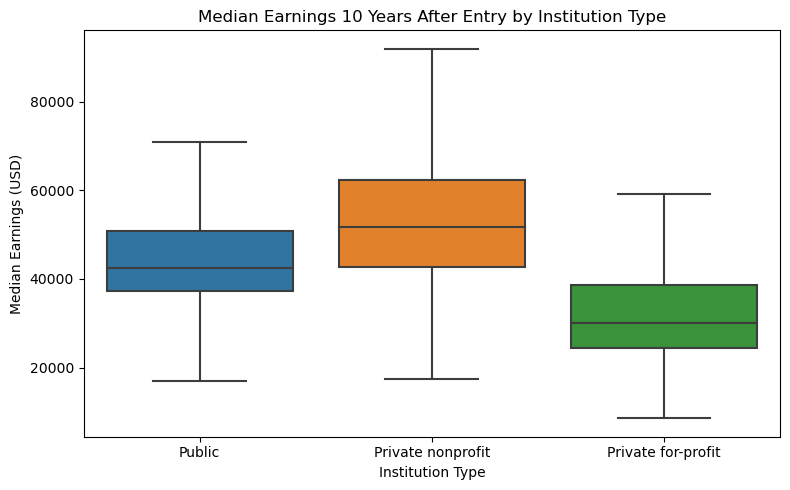

In [11]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_cleaned,
    x="CONTROL_LABEL",
    y="MD_EARN_WNE_P10",
    showfliers=False
)

plt.title("Median Earnings 10 Years After Entry by Institution Type")
plt.xlabel("Institution Type")
plt.ylabel("Median Earnings (USD)")
plt.tight_layout()
plt.show()

Private nonprofit institutions show higher median earnings, while private for-profit institutions lag behind. However, overlapping distributions suggest institution type alone does not determine earnings outcomes.

In [12]:
earnings_summary = (
    df_cleaned
        .groupby("CONTROL_LABEL")["MD_EARN_WNE_P10"]
        .agg(
            count="count",
            median="median",
            mean="mean"
        )
        .round(0)
        .sort_values("median", ascending=False)
)

earnings_summary

,count,median,mean
CONTROL_LABEL,,,
Private nonprofit,1472,51746.0,54044.0
Public,1964,42362.0,45329.0
Private for-profit,1844,30033.0,33159.0


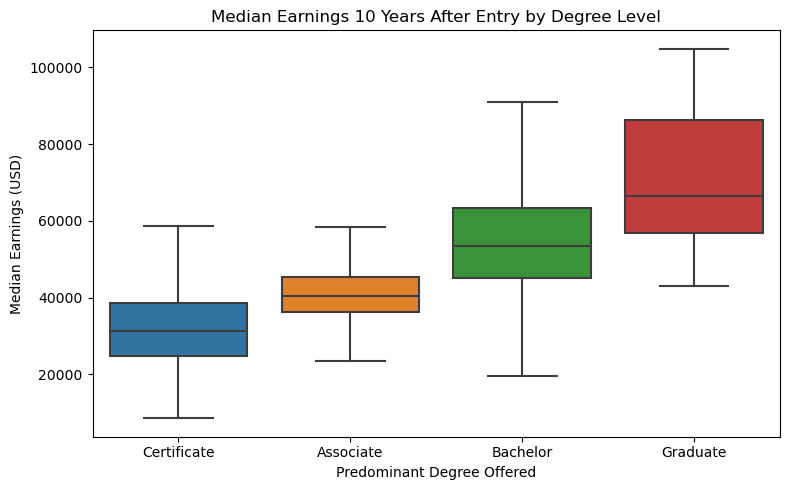

In [14]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_cleaned,
    x="PREDDEG_LABEL",
    y="MD_EARN_WNE_P10",
    showfliers=False,
    order=["Certificate", "Associate", "Bachelor", "Graduate"]
)

plt.title("Median Earnings 10 Years After Entry by Degree Level")
plt.xlabel("Predominant Degree Offered")
plt.ylabel("Median Earnings (USD)")
plt.tight_layout()
plt.show()

Institutions focused on bachelor’s and graduate degrees tend to have substantially higher median earnings than those focused on certificates or associate degrees

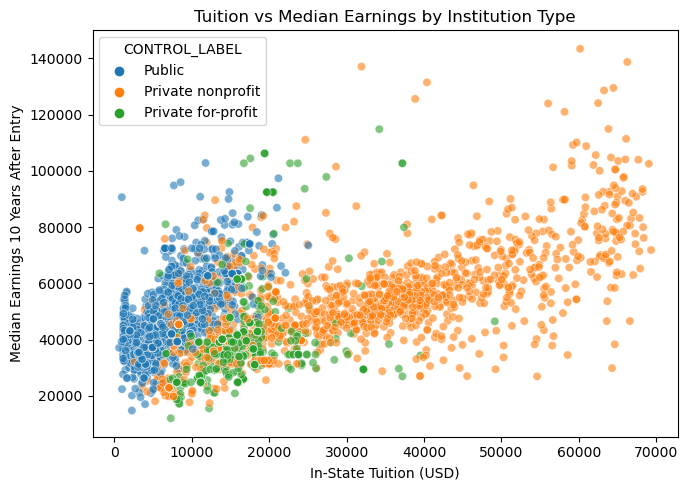

In [15]:
plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_cleaned,
    x="TUITIONFEE_IN",
    y="MD_EARN_WNE_P10",
    hue="CONTROL_LABEL",
    alpha=0.6
)

plt.title("Tuition vs Median Earnings by Institution Type")
plt.xlabel("In-State Tuition (USD)")
plt.ylabel("Median Earnings 10 Years After Entry")
plt.tight_layout()
plt.show()

Higher tuition does not consistently correspond to higher earnings, suggesting that cost alone is an unreliable proxy for return on investment.

In [18]:
df_selective = df_cleaned.dropna(subset=["ADM_RATE"]).copy()

df_selective["selectivity_bucket"] = pd.qcut(
    df_selective["ADM_RATE"],
    q=4,
    labels=["Most Selective", "Selective", "Less Selective", "Least Selective"]
)

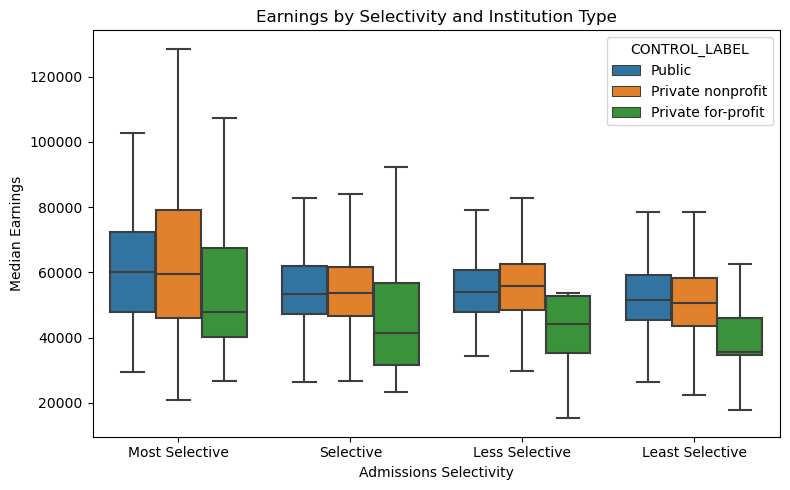

In [19]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df_selective,
    x="selectivity_bucket",
    y="MD_EARN_WNE_P10",
    hue="CONTROL_LABEL",
    showfliers=False
)

plt.title("Earnings by Selectivity and Institution Type")
plt.xlabel("Admissions Selectivity")
plt.ylabel("Median Earnings")
plt.tight_layout()
plt.show()

Within each selectivity tier, earnings differences across institution types narrow, implying that admissions selectivity may partially explain observed earnings gaps.

## Conclusions

This analysis suggests that long-term earnings outcomes are associated with multiple institutional characteristics, including degree level and admissions selectivity. While private nonprofit institutions exhibit higher median earnings on average, these differences appear partially driven by the credentials they offer and the selectivity of their admissions processes. Tuition cost alone does not reliably predict earnings outcomes.

## Recommendations and Future Work

Students evaluating higher education options should consider degree level and institutional selectivity in addition to institution type. Policymakers may wish to further examine outcomes at private for-profit institutions, where earnings outcomes appear consistently lower. Future analysis could incorporate field-of-study (major-level) earnings data, regional cost-of-living adjustments, and regression modeling to better isolate causal relationships. Additional data on student demographics and labor market conditions could further contextualize these findings.